In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [21]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:].values.ravel()

In [22]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 50), (2835,), (354, 50), (354,), (355, 50), (355,))

## Feature selection

Feature ranking:
1. feature Clean sheets (0.041)
2. feature Assists (0.040)
3. feature Passes (0.031)
4. feature Big Chances Created (0.028)
5. feature Goals (0.027)
6. feature Blocked shots (0.027)
7. feature Goals with right foot (0.024)
8. feature Goals Conceded (0.023)
9. feature Goals with left foot (0.022)
10. feature Shots on target (0.022)
11. feature Shots (0.021)
12. feature Clearances off line (0.021)
13. feature Cross accuracy % (0.021)
14. feature Hit woodwork (0.021)
15. feature Big chances missed (0.021)
16. feature Own goals (0.020)
17. feature Shooting accuracy % (0.019)
18. feature Tackle success % (0.019)
19. feature Through balls (0.019)
20. feature Passes per match (0.019)
21. feature Penalties scored (0.019)
22. feature Accurate long balls (0.019)
23. feature Punches (0.018)
24. feature High Claims (0.018)
25. feature Crosses (0.018)
26. feature Last man tackles (0.018)
27. feature Freekicks scored (0.018)
28. feature Clearances (0.018)
29. feature Goals per match

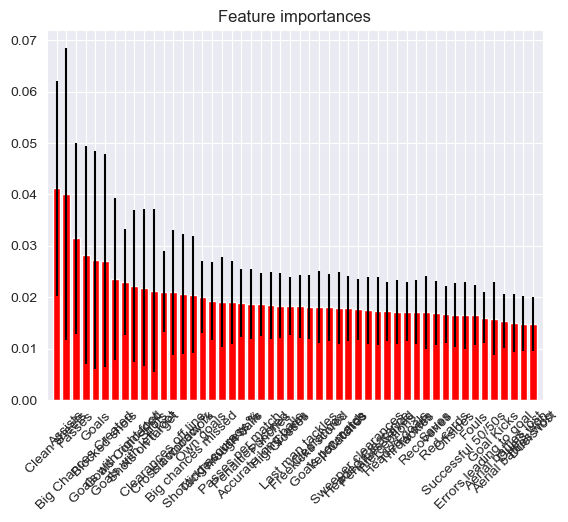

In [25]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

## Logistic Regression

In [26]:
clf = LogisticRegression()
clf.max_iter=500
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [27]:
clf.score(X_test,y_test)

0.519774011299435

In [28]:
clf.score(X_val,y_val)

0.5492957746478874

## SVM

In [29]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [30]:
clf.score(X_test,y_test)

0.536723163841808

In [31]:
clf.score(X_val,y_val)

0.5154929577464789

## SVM pairwise

In [32]:
clf=svm.LinearSVC()
clf.fit(X_train,y_train)

/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [33]:
clf.score(X_test,y_test)

0.5338983050847458

In [34]:
clf.score(X_val,y_val)

0.5521126760563381

## GridSearch to optimize hyperparameter

In [39]:
parameters = {'kernel':('linear', 'rbf'), 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C':[1, 10]}
svc=svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')})

In [40]:
print(clf.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [41]:
clf=svm.SVC(C=1,gamma=1,kernel='linear')
clf.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='linear')

In [42]:
clf.score(X_test,y_test)

0.5254237288135594

In [43]:
clf.score(X_val,y_val)

0.5577464788732395

In [53]:
clf = svm.SVC(C=10, gamma=1, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=10, gamma=1, kernel='linear')

In [54]:
clf.score(X_test,y_test)

0.5423728813559322

In [55]:
clf.score(X_val,y_val)

0.5549295774647888

In [47]:
clf=svm.SVC(C=1,gamma=1,kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=1, gamma=1)

In [48]:
clf.score(X_test,y_test)

0.4915254237288136

In [51]:
clf=svm.SVC(C=10,gamma=1,kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=10, gamma=1)

In [52]:
clf.score(X_test,y_test)

0.4632768361581921